In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## Visualizing data with Seaborn

> "The greatest value of a picture is when it forces us to notice what we never expected to see"

> *John Tukey*

![JohnTukey](https://upload.wikimedia.org/wikipedia/en/thumb/e/e9/John_Tukey.jpg/220px-John_Tukey.jpg)

In this lab we will visualise some data about Pokemons using a **Seaborn** library.

First, download the dataset and quickly look at the data.

In [5]:
pokemon = pd.read_csv("/Users/owner/Downloads/pokemon_2.csv")


In [6]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 1. Scatter plot

Let's compare the stats on special attacks (Sp.Atk) and damage resistance against special attacks (Sp.Def)

Before we actually start visualising the data, let's transform column names of a Pokemon data frame in a following way:

In [7]:
pokemon.columns = [c.lower() for c in pokemon.columns]


pokemon = pokemon.rename(columns = {
                '#':'num',
                'sp. atk' : 'sp_atk', 
                'sp. def' : 'sp_def',
                'type 1' : 'type_1',
                'type 2' : 'type_2',}) # don't foreget this last comma!



In [8]:
pokemon.head(5)

,num,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Now, let's plot our first scatter plot in Seaborn.

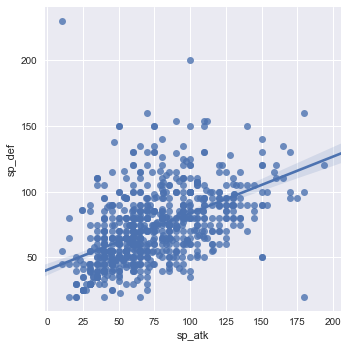

In [9]:
sns.lmplot(x = "sp_atk", y = "sp_def", data = pokemon)
plt.show()

One of the principles of effective visual display of information states:

**Maximise the Data-Ink ratio!!!**

*Data-Ink Ratio* = $\frac{Data Ink}{Total Ink Usid in Graphic}$

Let's demonstratehow this principle works by adding one more layer of informaion via the color - grouping data by generation.

Also, remove default regression line and pay attention to axes labels and ticks.

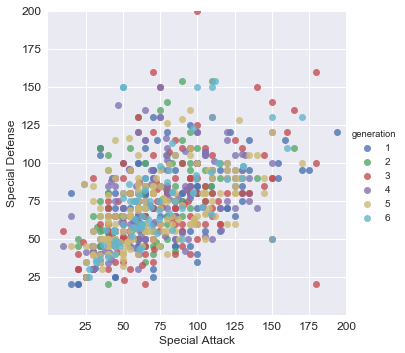

In [10]:
fig = sns.lmplot(x = 'sp_atk', y = 'sp_def',
          hue = 'generation', data = pokemon, fit_reg = False)
plt.xlabel('Special Attack', fontsize = 12)
plt.ylabel('Special Defense', fontsize = 12)
plt.yticks([25,50,75,100,125,150,175,200], fontsize = 12)
plt.xticks([25,50,75,100,125,150,175,200], fontsize = 12)
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()

What we just did was a combination of Seaborn and Matplotlib. In order to set axes options, we invoked Matplotlib's customization functions.

So, while Seaborn makes visualisation much easier, yet we can't fully avoid using Matplotlib. 

### 2. Now, let's make the following **box plot**

Notice that we set the axes' ticks size to 12 and rename X axis ticks.

**Important: create a data frame consisting only of the name, type I and all the scores, but the total one. Let's call it *stats***

In [11]:
stats = pokemon[['name','type_1','hp','attack','defense', 'sp_atk', 'sp_def', 'speed']].copy()
stats.head(5)

,name,type_1,hp,attack,defense,sp_atk,sp_def,speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


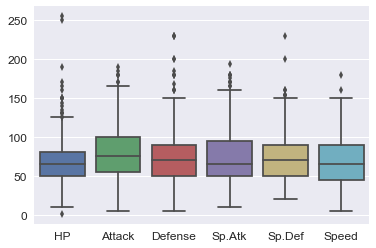

In [12]:
sns.set(style = 'darkgrid')
box = sns.boxplot(data = stats)
#CHange the labels
labels = [item.get_text() for item in box.get_xticklabels()]
labels[0] = 'HP'
labels[1] = 'Attack'
labels[2] = 'Defense'
labels[3] = 'Sp.Atk'
labels[4] = 'Sp.Def'
labels[5] = 'Speed'
box.set_xticklabels(labels)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


### 3. Adding a theme

*Seaborn* library comes with a rich variety of styles. 
We will try a 'whitegrid' style and learn about violin plots. Besides, we will need to increase the size of the chart.

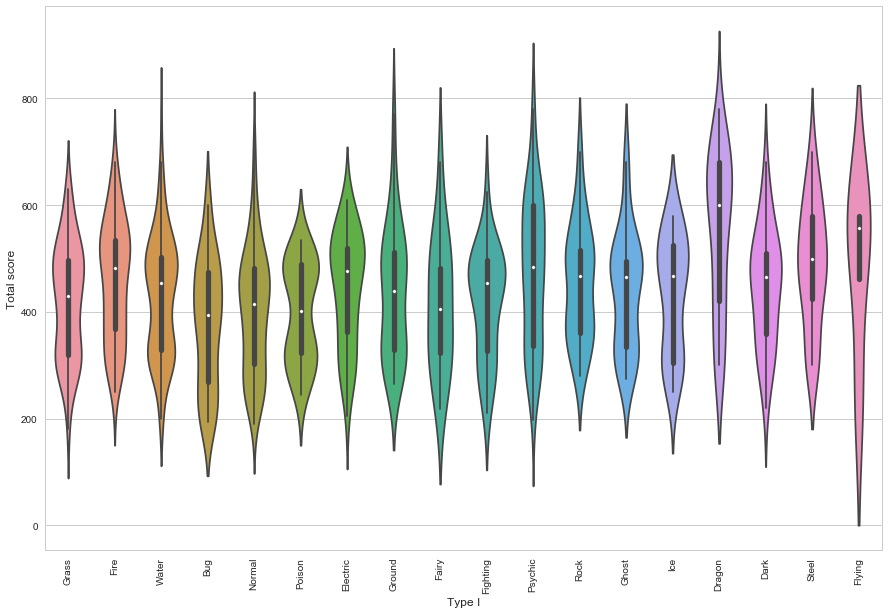

In [18]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize']=(15,10)
vplot = sns.violinplot(data = pokemon, x = 'type_1', y = 'total')
plt.xlabel('Type I', fontsize = 12)
plt.ylabel('Total score', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

Now, what if we want to change the colors at the plot? For example, we'd rather have 'Water' look blue than yelowish.

To do so, we can create our own palette list in an order we need and pass this palette as an argument of ```sns.violinplot()```.

Below we provide the dictionary of color codes you may choose from (although feel free to find more variations, for example, [here](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates)).

Also, don't forget to format the following:
- set label font size to 18
- rotate X axis ticks and set their size to 14
- add space between the X axis ticks and axis label.

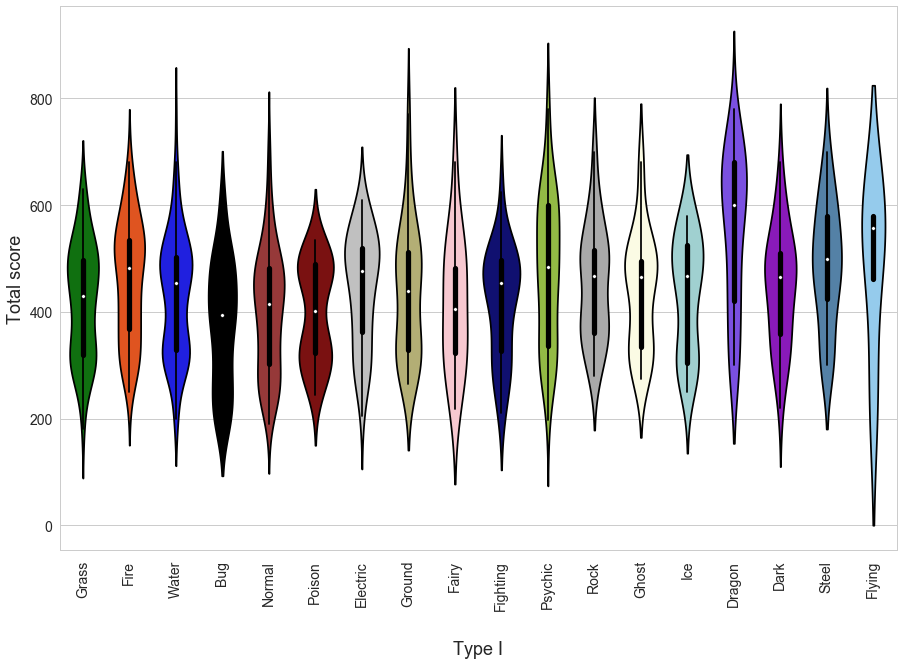

In [14]:
pokemon_types = ['#008000', #grass
                '#FF4500', #fire
                '#0000FF', #water
                '#000000',#bug
                '#A52A2A', #normal
                '#8B0000', #poison
                '#C0C0C0', #electric
                '#BDB76B', #ground
                '#FFC0CB', #fairy
                '#000080', #fighting
                '#9ACD32', #psychic
                '#A9A9A9', #rock
                '#FFFFE0', #ghost
                '#98D8D8', #ice
                '#7038F8', #dragon
                '#9400D3', #dark
                '#4682B4', #steel
                '#87CEFA'] #flying

vplot = sns.violinplot(data = pokemon, x = 'type_1', y = 'total', palette = pokemon_types)
plt.xlabel('Type I', fontsize = 18, labelpad = 30) #labelpad adds space between
plt.ylabel('Total score', fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(rotation = 0, fontsize = 14)
plt.tick_params(axis='x', which='major', pad=10)

plt.show()

In [16]:
color_codes = {
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'darkblue':             '#00008B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'fuchsia':              '#FF00FF',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'mediumblue':           '#0000CD',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'navy':                 '#000080',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'purple':               '#800080',
'red':                  '#FF0000',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

### 4. Overlaying charts

Next, while violin plots are most informative when we have large data sets and, hence, plotting distributions (that's what violins actually are!) makes more sense, let's just plot each point of a total score by type.

Here we will build a **swarmplot** and then we'll overlay it on violin plot!

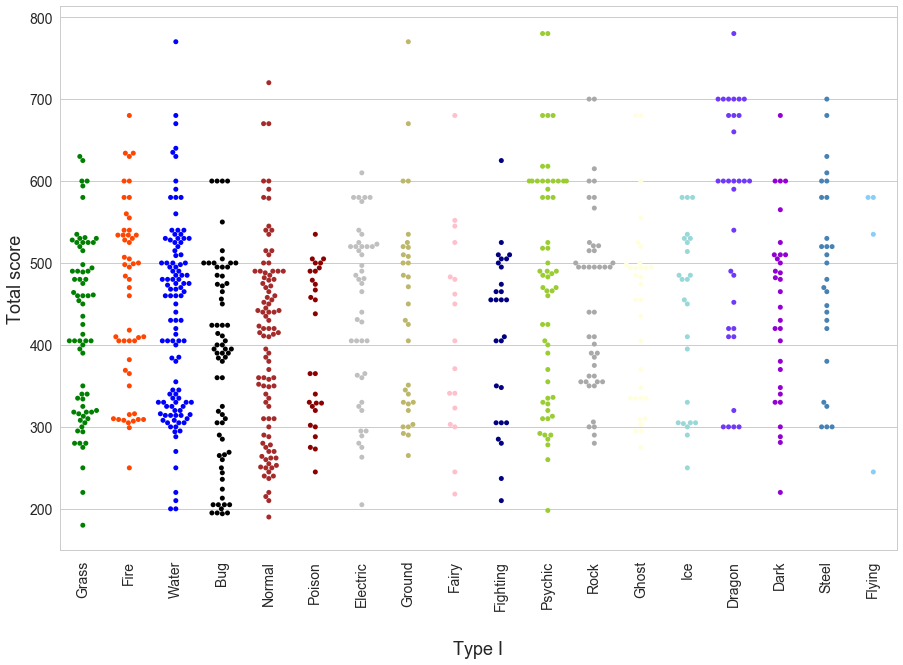

In [144]:
pokemon_types = ['#008000', #grass
                '#FF4500', #fire
                '#0000FF', #water
                '#000000',#bug
                '#A52A2A', #normal
                '#8B0000', #poison
                '#C0C0C0', #electric
                '#BDB76B', #ground
                '#FFC0CB', #fairy
                '#000080', #fighting
                '#9ACD32', #psychic
                '#A9A9A9', #rock
                '#FFFFE0', #ghost
                '#98D8D8', #ice
                '#7038F8', #dragon
                '#9400D3', #dark
                '#4682B4', #steel
                '#87CEFA'] #flying

vplot = sns.swarmplot(data = pokemon, x = 'type_1', y = 'total', palette = pokemon_types)
plt.xlabel('Type I', fontsize = 18, labelpad = 30) #labelpad adds space between
plt.ylabel('Total score', fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(rotation = 0, fontsize = 14)
plt.tick_params(axis='x', which='major', pad=10)

plt.show()

Let's overlay the two plots (don't forget to remove the inner bar from the violinplot by setting ```inner = None```)

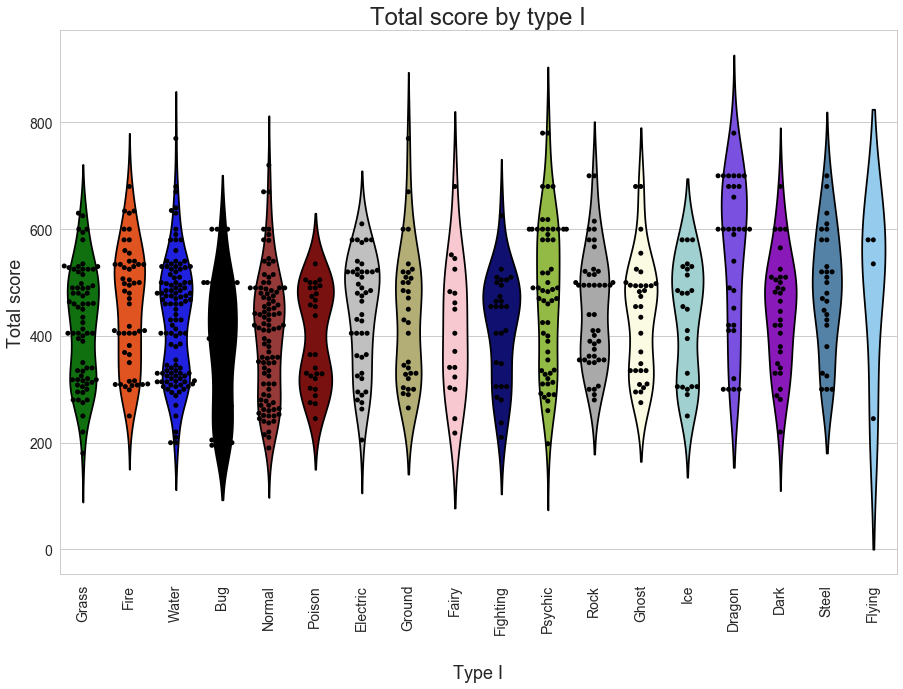

In [150]:
# Create two plots

#Violin plot
pokemon_types = ['#008000', #grass
                '#FF4500', #fire
                '#0000FF', #water
                '#000000',#bug
                '#A52A2A', #normal
                '#8B0000', #poison
                '#C0C0C0', #electric
                '#BDB76B', #ground
                '#FFC0CB', #fairy
                '#000080', #fighting
                '#9ACD32', #psychic
                '#A9A9A9', #rock
                '#FFFFE0', #ghost
                '#98D8D8', #ice
                '#7038F8', #dragon
                '#9400D3', #dark
                '#4682B4', #steel
                '#87CEFA'] #flying

sns.violinplot(data = pokemon,
                       x = 'type_1', 
                       y = 'total', 
                       palette = pokemon_types, 
                       inner = None) # removing the inner bars
plt.xlabel('Type I', fontsize = 18, labelpad = 30) #labelpad adds space between
plt.ylabel('Total score', fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(rotation = 0, fontsize = 14)
plt.tick_params(axis='x', which='major', pad=10)

# Swarm plot


sns.swarmplot(data = pokemon, 
                      x = 'type_1', 
                      y = 'total', 
                      color = 'k') # make dots black
plt.xlabel('Type I', fontsize = 18, labelpad = 30) #labelpad adds space between
plt.ylabel('Total score', fontsize = 18)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(rotation = 0, fontsize = 14)
plt.tick_params(axis='x', which='major', pad=10)

plt.title("Total score by type I", fontsize = 24)

plt.show()

### 5. Draw all scores by types in one chart

Sounds cumbersome... To see the distributions of all the scores (not just the total as previously) in one chart (and make it tidy and nice), we first need to transform, or *'melt'*, our data frame from the *wide* format to the *long* one. It means that instead of the six columns with different scores we will have one column with the name of a score and another one with the value of this score. Thus, we will increase the number of rows by 6 times.

*Hint: to melt the data frame use ```pd.melt()```*

In [17]:
melted = pd.melt(stats, 
                 id_vars = ['name', 'type_1'],
                var_name = 'score')# variables to keep
melted.tail(5)

,name,type_1,score,value
4795,Diancie,Rock,speed,50
4796,DiancieMega Diancie,Rock,speed,110
4797,HoopaHoopa Confined,Psychic,speed,70
4798,HoopaHoopa Unbound,Psychic,speed,80
4799,Volcanion,Fire,speed,70


Now, let's plot a swarm plot, setting ```hue = type_1```.

Also, make the following adjustments:

1. Change the X axis labels (font size = 18)
2. Change X axis ticks (font size = 14)
3. Add the legend to the right of the chart and set a font size to 14
4. Make sure that the Y axis limits are from 0 to 250

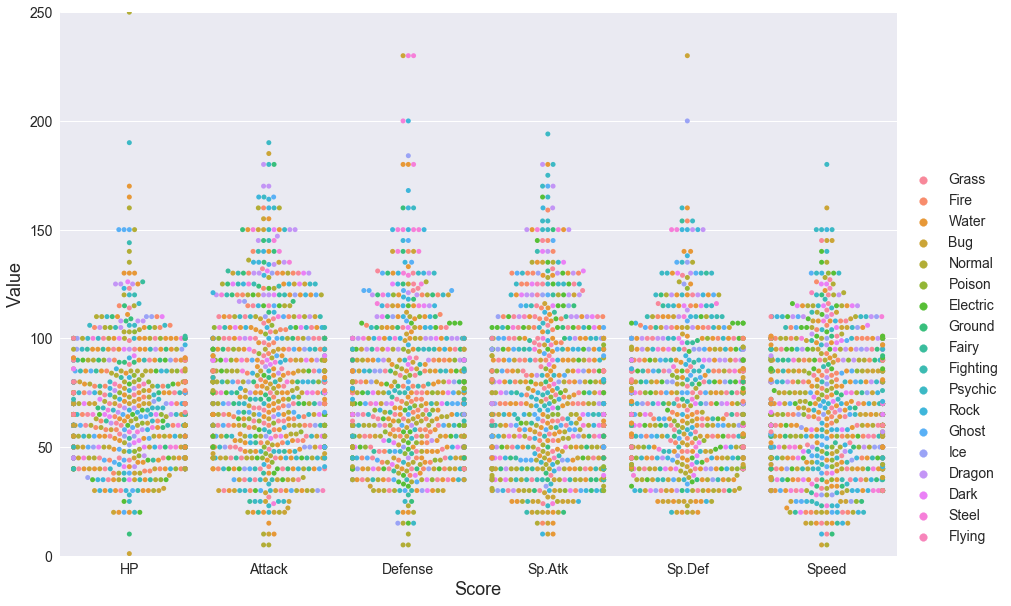

In [180]:
swarm = sns.swarmplot(data = melted,
              x = 'score',
              y  = 'value',
             hue = 'type_1')

#Change the labels
labels = [item.get_text() for item in swarm.get_xticklabels()]
labels[0] = 'HP'
labels[1] = 'Attack'
labels[2] = 'Defense'
labels[3] = 'Sp.Atk'
labels[4] = 'Sp.Def'
labels[5] = 'Speed'
swarm.set_xticklabels(labels) #don't forget to change the labels

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('Value', fontsize = 18)
plt.ylim(0,250)
#Place the legend to the right

plt.legend(bbox_to_anchor=(1, 0), loc = 3, fontsize = 14)

plt.show()


### 6. Heatmap

**Heatmap** is a great tool to visualise correlations. Let's show how correlated are the scores.

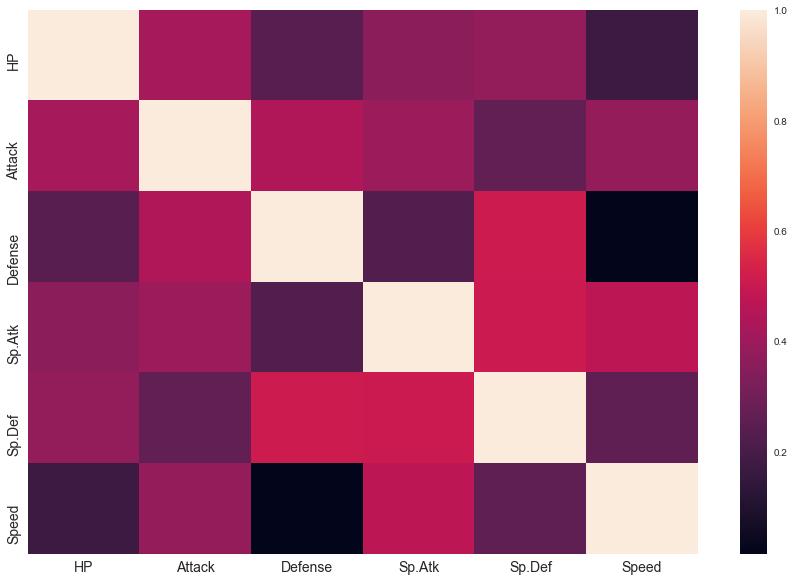

In [191]:
score_corr = stats.corr()
# Make a heatmap object
htmp = sns.heatmap(score_corr)
#Change labels
labels = [item.get_text() for item in htmp.get_xticklabels()]
labels[0] = 'HP'
labels[1] = 'Attack'
labels[2] = 'Defense'
labels[3] = 'Sp.Atk'
labels[4] = 'Sp.Def'
labels[5] = 'Speed'
htmp.set_xticklabels(labels)
htmp.set_yticklabels(labels)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

### 7. Histogram

Finally, it's time for an old-school but so necessary in many analyses histogram!

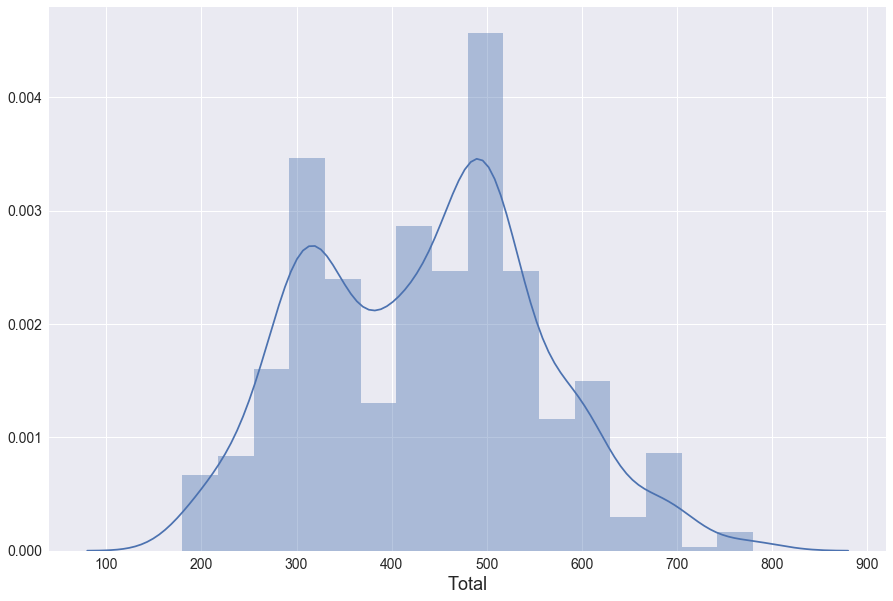

In [194]:
sns.distplot(pokemon.total)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("Total", fontsize = 18)
plt.show()

### 8. Bar plots

Bar plots are especially useful for displaying categorical variables distribution.
Again, don't forget to format the colors, label ticks and label names and spaces!

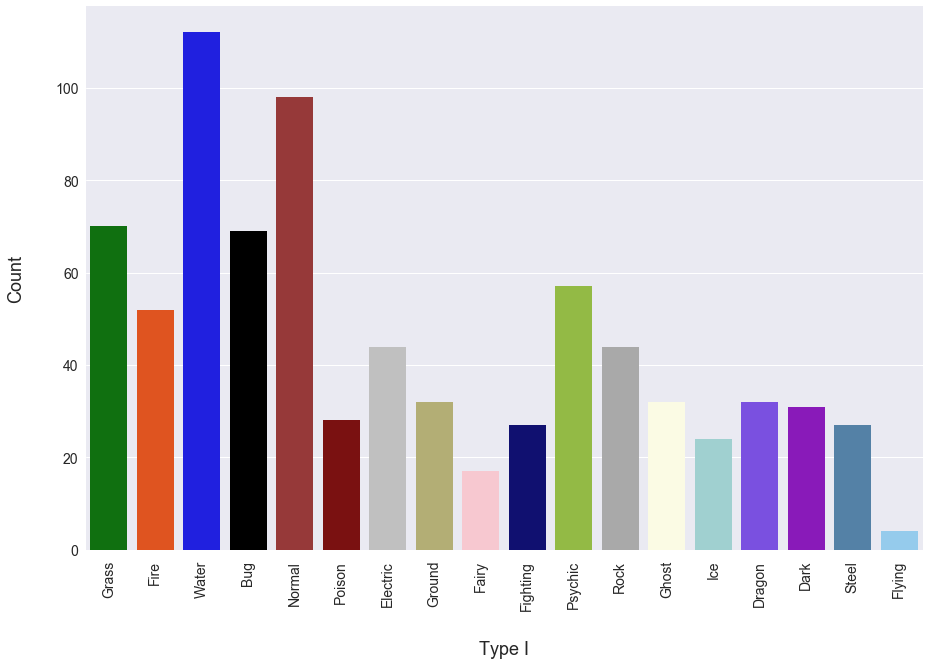

In [197]:
 #Bar plots
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='type_1', data=pokemon, palette= pokemon_types)
 
# Rotate x-labels
plt.xticks(rotation=90)
plt.xlabel('Type I', fontsize = 18, labelpad = 30) #labelpad adds space between
plt.ylabel('Count', fontsize = 18, labelpad = 30) #labelpad adds space between
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(rotation = 0, fontsize = 14)
plt.tick_params(axis='x', which='major', pad=10)


### 9. Factor plots and Facet Grid plots

We can separate plots by categorical variables using **factor plots**

Let's make a subset of pokemon data, keeping only those pokemons with type 1 "Water" and "Normal" and then plot a total score by generation for each of these two types.

In [222]:
water_normal = pokemon[pokemon['type_1'].isin(["Water", "Normal"])]
water_normal.shape

(210, 13)

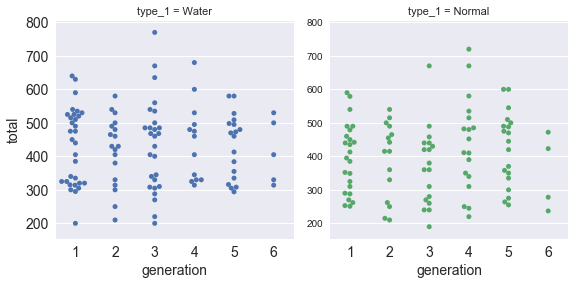

In [247]:
# Factor Plot
fct = sns.factorplot(x='generation', 
                   y='total', 
                   data=water_normal, 
                   hue='type_1',  # Color by generation
                   col='type_1',  # Separate by generation
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
fct.set_xticklabels(rotation=0, fontsize = 14)
fct.set_yticklabels(rotation=0, fontsize = 14)
fct.set_xlabels(fontsize = 14)
fct.set_ylabels(fontsize = 14)
plt.show()
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

### 10. Density plot

To explore the distribution between the two variables you migh consider looking at a **density plot**. 

For example, let's make the density plot for Special Attack vs Special Defense scores, overlaid by the scatterplot.

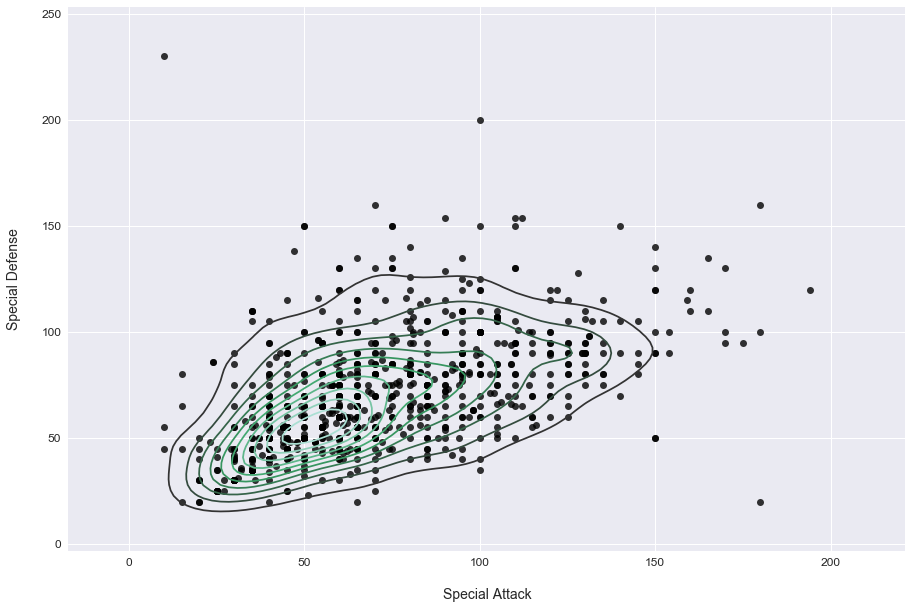

In [259]:
# Create density plot
sns.kdeplot(pokemon.sp_atk, pokemon.sp_def)

# Add a scatter plot layer
sns.regplot(data = pokemon, 
                      x = 'sp_atk', 
                      y = 'sp_def', 
                      color = 'k',
                    fit_reg = False
                        ) # make dots black
plt.xlabel("Special Attack", fontsize = 14, labelpad = 20)
plt.ylabel("Special Defense", fontsize  =14, labelpad = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()